### i. Install dependencies

In [2]:
!sudo apt-get install git -y
!sudo apt-get install wget -y
!sudo apt-get install unzip -y
!sudo apt-get install htop -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  git-man less libcurl3-gnutls liberror-perl libssl1.0.0 libxmuu1
  openssh-client xauth
Suggested packages:
  gettext-base git-daemon-run | git-daemon-sysvinit git-doc git-el git-email
  git-gui gitk gitweb git-cvs git-mediawiki git-svn keychain libpam-ssh
  monkeysphere ssh-askpass
The following NEW packages will be installed:
  git git-man less libcurl3-gnutls liberror-perl libssl1.0.0 libxmuu1
  openssh-client xauth
0 upgraded, 9 newly installed, 0 to remove and 3 not upgraded.
Need to get 6814 kB of archives.
After this operation, 42.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 less amd64 487-0.1 [112 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libssl1.0.0 amd64 1.0.2n-1ubuntu5.7 [1089 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libxmuu1 

In [3]:
!pip install mmdet
!pip install instaboostfast
!pip install git+https://github.com/cocodataset/panopticapi.git
!pip install git+https://github.com/lvis-dataset/lvis-api.git
!pip install albumentations>=0.3.2 --no-binary imgaug,albumentations

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.3 MB 25.8 MB/s            
Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 38.1 MB 26.7 MB/s            
     |████████████████████████████████| 13.3 MB 73.8 MB/s            
     |████████████████████████████████| 6.1 MB 98.9 MB/s            
     |████████████████████████████████| 3.3 MB 99.2 MB/s            
     |████████████████████████████████| 178 kB 110.7 MB/s            
     |████████████████████████████████| 1.9 MB 87.5 MB/s            
  Created wheel for instaboostfast: filename=instaboostfast-0.1.2-py3-none-any.whl size=14790 sha256=5e3d0835d4488ce4362002eb20afbc88f2e96082b85e1577eda562a407f5a998
  Stored in directory: /home/juno/.cache/pip/wheels/f5/ff/88/1e808422f9e6b1f3c4356a2a3c54ff7f6a32595e7dba8cdf5f
Successfully built instaboostfast
  Con

In [4]:
!git clone https://github.com/open-mmlab/mmdetection.git

Cloning into 'mmdetection'...
remote: Enumerating objects: 22714, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 22714 (delta 13), reused 17 (delta 1), pack-reused 22679
Receiving objects: 100% (22714/22714), 25.64 MiB | 43.25 MiB/s, done.
Resolving deltas: 100% (15890/15890), done.


### ii. Run `mmdetection/demo/MMDet_Tutorial.ipynb` contents (below) file with SegmindLoggerHook

In [5]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.10.0 True
2.20.0
11.3
GCC 7.3


## Perform inference with a MMDet detector
MMDetection already provides high level APIs to do inference and training.

In [6]:
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth \
      -O checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth

--2022-01-19 17:22:05--  https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.28
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177867103 (170M) [application/octet-stream]
Saving to: ‘checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth’

checkpoints/mask_rc 100%[===================>] 169.63M  7.28MB/s    in 22s     

2022-01-19 17:22:28 (7.82 MB/s) - ‘checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth’ saved [177867103/177867103]



In [8]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# Choose to use a config and initialize the detector
config = '/home/juno/mmdetection/configs/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco.py'
# Setup a checkpoint file to load
checkpoint = '/home/juno/checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'
# initialize the detector
model = init_detector(config, checkpoint, device='cuda:0')

load checkpoint from local path: /home/juno/checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth


In [9]:
# Use the detector to do inference
img = '/home/juno/mmdetection/demo/demo.jpg'
result = inference_detector(model, img)

/home/juno/.local/lib/python3.7/site-packages/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


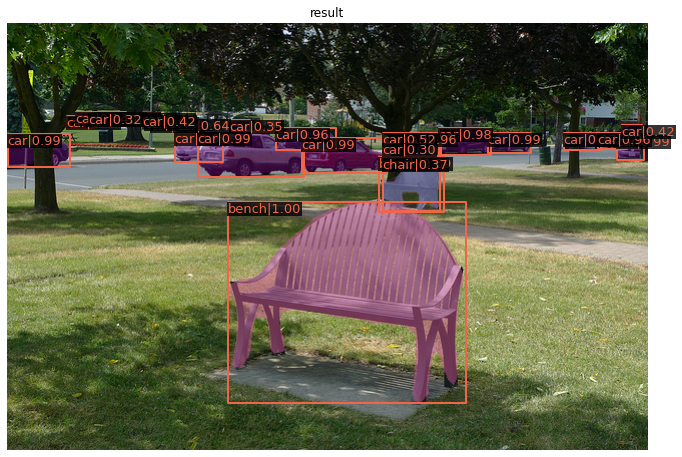

In [10]:
# Let's plot the result
show_result_pyplot(model, img, result, score_thr=0.3)

## Train a detector on customized dataset

To train a new detector, there are usually three things to do:
1. Support a new dataset
2. Modify the config
3. Train a new detector

### Support a new dataset

There are three ways to support a new dataset in MMDetection: 
  1. reorganize the dataset into COCO format.
  2. reorganize the dataset into a middle format.
  3. implement a new dataset.

Usually we recommend to use the first two methods which are usually easier than the third.

In this tutorial, we gives an example that converting the data into the format of existing datasets like COCO, VOC, etc. Other methods and more advanced usages can be found in the [doc](https://mmdetection.readthedocs.io/en/latest/tutorials/new_dataset.html#).

Firstly, let's download a tiny dataset obtained from [KITTI](http://www.cvlibs.net/datasets/kitti/eval_object.php?obj_benchmark=3d). We select the first 75 images and their annotations from the 3D object detection dataset (it is the same dataset as the 2D object detection dataset but has 3D annotations). We convert the original images from PNG to JPEG format with 80% quality to reduce the size of dataset.

In [12]:
# download, decompress the data
!wget https://download.openmmlab.com/mmdetection/data/kitti_tiny.zip
!unzip kitti_tiny.zip > /dev/null

--2022-01-19 17:24:14--  https://download.openmmlab.com/mmdetection/data/kitti_tiny.zip
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.28
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6918271 (6.6M) [application/zip]
Saving to: ‘kitti_tiny.zip’

kitti_tiny.zip      100%[===================>]   6.60M  10.1MB/s    in 0.7s    

2022-01-19 17:24:16 (10.1 MB/s) - ‘kitti_tiny.zip’ saved [6918271/6918271]



In [13]:
# Check the directory structure of the tiny data

!tree kitti_tiny

kitti_tiny
├── train.txt
├── training
│   ├── image_2
│   │   ├── 000000.jpeg
│   │   ├── 000001.jpeg
│   │   ├── 000002.jpeg
│   │   ├── 000003.jpeg
│   │   ├── 000004.jpeg
│   │   ├── 000005.jpeg
│   │   ├── 000006.jpeg
│   │   ├── 000007.jpeg
│   │   ├── 000008.jpeg
│   │   ├── 000009.jpeg
│   │   ├── 000010.jpeg
│   │   ├── 000011.jpeg
│   │   ├── 000012.jpeg
│   │   ├── 000013.jpeg
│   │   ├── 000014.jpeg
│   │   ├── 000015.jpeg
│   │   ├── 000016.jpeg
│   │   ├── 000017.jpeg
│   │   ├── 000018.jpeg
│   │   ├── 000019.jpeg
│   │   ├── 000020.jpeg
│   │   ├── 000021.jpeg
│   │   ├── 000022.jpeg
│   │   ├── 000023.jpeg
│   │   ├── 000024.jpeg
│   │   ├── 000025.jpeg
│   │   ├── 000026.jpeg
│   │   ├── 000027.jpeg
│   │   ├── 000028.jpeg
│   │   ├── 000029.jpeg
│   │   ├── 000030.jpeg
│   │   ├── 000031.jpeg
│   │   ├── 000032.jpeg
│   │   ├── 000033.jpeg
│   │   ├── 000034.jpeg
│   │   ├── 000035.jpeg
│   │   ├── 000036.jpeg
│   │   ├── 000037.jpeg
│   │   ├── 000038.jpeg
│   │   ├─

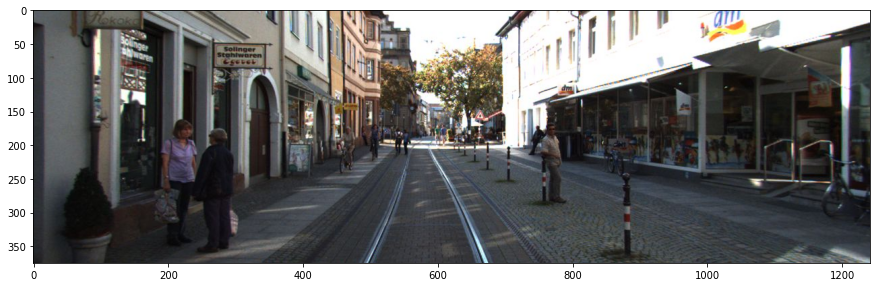

In [14]:
# Let's take a look at the dataset image
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('kitti_tiny/training/image_2/000073.jpeg')
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

After downloading the data, we need to implement a function to convert the kitti annotation format into the middle format. In this tutorial we choose to convert them in **`load_annotations`** function in a newly implemented **`KittiTinyDataset`**.

Let's take a look at the annotation txt file.

In [15]:
# Check the label of a single image
!cat kitti_tiny/training/label_2/000000.txt

Pedestrian 0.00 0 -0.20 712.40 143.00 810.73 307.92 1.89 0.48 1.20 1.84 1.47 8.41 0.01


In [16]:
import copy
import os.path as osp

import mmcv
import numpy as np

from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset

@DATASETS.register_module()
class KittiTinyDataset(CustomDataset):

    CLASSES = ('Car', 'Pedestrian', 'Cyclist')

    def load_annotations(self, ann_file):
        cat2label = {k: i for i, k in enumerate(self.CLASSES)}
        # load image list from file
        image_list = mmcv.list_from_file(self.ann_file)
    
        data_infos = []
        # convert annotations to middle format
        for image_id in image_list:
            filename = f'{self.img_prefix}/{image_id}.jpeg'
            image = mmcv.imread(filename)
            height, width = image.shape[:2]
    
            data_info = dict(filename=f'{image_id}.jpeg', width=width, height=height)
    
            # load annotations
            label_prefix = self.img_prefix.replace('image_2', 'label_2')
            lines = mmcv.list_from_file(osp.join(label_prefix, f'{image_id}.txt'))
    
            content = [line.strip().split(' ') for line in lines]
            bbox_names = [x[0] for x in content]
            bboxes = [[float(info) for info in x[4:8]] for x in content]
    
            gt_bboxes = []
            gt_labels = []
            gt_bboxes_ignore = []
            gt_labels_ignore = []
    
            # filter 'DontCare'
            for bbox_name, bbox in zip(bbox_names, bboxes):
                if bbox_name in cat2label:
                    gt_labels.append(cat2label[bbox_name])
                    gt_bboxes.append(bbox)
                else:
                    gt_labels_ignore.append(-1)
                    gt_bboxes_ignore.append(bbox)

            data_anno = dict(
                bboxes=np.array(gt_bboxes, dtype=np.float32).reshape(-1, 4),
                labels=np.array(gt_labels, dtype=np.long),
                bboxes_ignore=np.array(gt_bboxes_ignore,
                                       dtype=np.float32).reshape(-1, 4),
                labels_ignore=np.array(gt_labels_ignore, dtype=np.long))

            data_info.update(ann=data_anno)
            data_infos.append(data_info)

        return data_infos

### Modify the config

In the next step, we need to modify the config for the training.
To accelerate the process, we finetune a detector using a pre-trained detector.

In [17]:
from mmcv import Config
cfg = Config.fromfile('/home/juno/mmdetection/configs/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_1x_coco.py')

Given a config that trains a Faster R-CNN on COCO dataset, we need to modify some values to use it for training Faster R-CNN on KITTI dataset.

In [18]:
from mmdet.apis import set_random_seed

# Modify dataset type and path
cfg.dataset_type = 'KittiTinyDataset'
cfg.data_root = 'kitti_tiny/'

cfg.data.test.type = 'KittiTinyDataset'
cfg.data.test.data_root = 'kitti_tiny/'
cfg.data.test.ann_file = 'train.txt'
cfg.data.test.img_prefix = 'training/image_2'

cfg.data.train.type = 'KittiTinyDataset'
cfg.data.train.data_root = 'kitti_tiny/'
cfg.data.train.ann_file = 'train.txt'
cfg.data.train.img_prefix = 'training/image_2'

cfg.data.val.type = 'KittiTinyDataset'
cfg.data.val.data_root = 'kitti_tiny/'
cfg.data.val.ann_file = 'val.txt'
cfg.data.val.img_prefix = 'training/image_2'

# modify num classes of the model in box head
cfg.model.roi_head.bbox_head.num_classes = 3
# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = 'checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './tutorial_exps'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# Change the evaluation metric since we use customized dataset.
cfg.evaluation.metric = 'mAP'
# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 12
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 12

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)


# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')


Config:
model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=False),
        norm_eval=True,
        style='caffe',
        init_cfg=dict(
            type='Pretrained',
            checkpoint='open-mmlab://detectron2/resnet50_caffe')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='Cro

### Train a new detector

Finally, lets initialize the dataset and detector, then train a new detector!

In [19]:
cfg.data.workers_per_gpu = 0

### ii. register Segmind Hook manually

In [20]:
from mmcv.runner import HOOKS, LoggerHook, master_only

from segmind.tracking.fluent import log_metrics
from segmind.utils.logging_utils import try_mlflow_log


@HOOKS.register_module()
class SegmindLoggerHook(LoggerHook):
    """Class to log metrics to Segmind.
    It requires `Segmind`_ to be installed.
    .. _Segmind:
        https://docs.segmind.com/python-library
    """

    def __init__(self):
        super(SegmindLoggerHook, self).__init__()
        self.import_segmind()

    def import_segmind(self):
        try:
            import segmind
        except ImportError:
            raise ImportError(
                "Please run 'pip install segmind' to install segmind")
        self.segmind_log_metrics = segmind.tracking.fluent.log_metrics
        self.segmind_mlflow_log = segmind.utils.logging_utils.try_mlflow_log

    @master_only
    def log(self, runner):
        tags = self.get_loggable_tags(runner, add_mode=True)
        if tags:
            # logging metrics to segmind
            self.segmind_mlflow_log(
                self.segmind_log_metrics,
                tags,
                step=runner.epoch,
                epoch=runner.epoch)

In [23]:
custom_hooks = [dict(type='SegmindLoggerHook')]
cfg.custom_hooks = custom_hooks

In [24]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector


# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(
    cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:53: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/home/juno/.local/lib/python3.7/site-packages/mmdet/datasets/custom.py:178: UserWarning: CustomDataset does not support filtering empty gt images.
  'CustomDataset does not support filtering empty gt images.')
2022-01-19 17:30:10,407 - mmdet - INFO - load checkpoint from local path: check

endpoint:  /api/2.0/mlflow/runs/create {'method': 'POST', 'json': {'experiment_id': '511effe6-9d42-4856-8e67-c98ffbe94d91', 'tags': [{'key': 'cral.tracking.user', 'value': 'juno'}, {'key': 'cral.tracking.source.name', 'value': '/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py'}, {'key': 'cral.tracking.source.type', 'value': 'LOCAL'}]}}
endpoint:  /api/2.0/mlflow/runs/log-batch {'method': 'POST', 'json': {'run_id': 'a4f3c370531c4dcb80ac4fa0e7190f31', 'metrics': [{'key': 'train/loss_rpn_cls', 'value': 0.029117447813041507, 'timestamp': '1642613417210', 'step': '0', 'epoch': '0', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_rpn_bbox', 'value': 0.018478746851906182, 'timestamp': '1642613417210', 'step': '0', 'epoch': '0', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_cls', 'value': 0.5747221738100052, 'timestamp': '1642613417210', 'step': '0', 'epoch': '0', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/acc', 'valu

2022-01-19 17:30:18,774 - mmdet - INFO - Epoch [1][10/25]	lr: 2.500e-03, eta: 0:03:58, time: 0.821, data_time: 0.232, memory: 2136, loss_rpn_cls: 0.0291, loss_rpn_bbox: 0.0185, loss_cls: 0.5747, acc: 77.8906, loss_bbox: 0.4238, loss: 1.0461


endpoint:  /api/2.0/mlflow/runs/log-batch {'method': 'POST', 'json': {'run_id': 'a4f3c370531c4dcb80ac4fa0e7190f31', 'metrics': [{'key': 'train/loss_rpn_cls', 'value': 0.01488575995899737, 'timestamp': '1642613421784', 'step': '0', 'epoch': '0', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_rpn_bbox', 'value': 0.012362291058525442, 'timestamp': '1642613421784', 'step': '0', 'epoch': '0', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_cls', 'value': 0.1709631510078907, 'timestamp': '1642613421784', 'step': '0', 'epoch': '0', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/acc', 'value': 94.072265625, 'timestamp': '1642613421784', 'step': '0', 'epoch': '0', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_bbox', 'value': 0.31649989560246466, 'timestamp': '1642613421784', 'step': '0', 'epoch': '0', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss', 'value': 0.5147110968828201, 'timestamp': 

2022-01-19 17:30:23,262 - mmdet - INFO - Epoch [1][20/25]	lr: 2.500e-03, eta: 0:02:57, time: 0.449, data_time: 0.031, memory: 2136, loss_rpn_cls: 0.0149, loss_rpn_bbox: 0.0124, loss_cls: 0.1710, acc: 94.0723, loss_bbox: 0.3165, loss: 0.5147


endpoint:  /api/2.0/mlflow/runs/log-batch {'method': 'POST', 'json': {'run_id': 'a4f3c370531c4dcb80ac4fa0e7190f31', 'metrics': [{'key': 'train/loss_rpn_cls', 'value': 0.009985260327812284, 'timestamp': '1642613429775', 'step': '1', 'epoch': '1', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_rpn_bbox', 'value': 0.011934715823736041, 'timestamp': '1642613429775', 'step': '1', 'epoch': '1', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_cls', 'value': 0.14303249791264533, 'timestamp': '1642613429775', 'step': '1', 'epoch': '1', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/acc', 'value': 94.736328125, 'timestamp': '1642613429775', 'step': '1', 'epoch': '1', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_bbox', 'value': 0.24818339794874192, 'timestamp': '1642613429775', 'step': '1', 'epoch': '1', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss', 'value': 0.41313587576150895, 'timestamp

2022-01-19 17:30:31,408 - mmdet - INFO - Epoch [2][10/25]	lr: 2.500e-03, eta: 0:02:26, time: 0.669, data_time: 0.232, memory: 2136, loss_rpn_cls: 0.0100, loss_rpn_bbox: 0.0119, loss_cls: 0.1430, acc: 94.7363, loss_bbox: 0.2482, loss: 0.4131


endpoint:  /api/2.0/mlflow/runs/log-batch {'method': 'POST', 'json': {'run_id': 'a4f3c370531c4dcb80ac4fa0e7190f31', 'metrics': [{'key': 'train/loss_rpn_cls', 'value': 0.011611665348755195, 'timestamp': '1642613434456', 'step': '1', 'epoch': '1', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_rpn_bbox', 'value': 0.013400931609794497, 'timestamp': '1642613434456', 'step': '1', 'epoch': '1', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_cls', 'value': 0.13023944199085236, 'timestamp': '1642613434456', 'step': '1', 'epoch': '1', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/acc', 'value': 95.01953125, 'timestamp': '1642613434456', 'step': '1', 'epoch': '1', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_bbox', 'value': 0.22287056222558022, 'timestamp': '1642613434456', 'step': '1', 'epoch': '1', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss', 'value': 0.37812260389328, 'timestamp': '

2022-01-19 17:30:35,848 - mmdet - INFO - Epoch [2][20/25]	lr: 2.500e-03, eta: 0:02:15, time: 0.444, data_time: 0.032, memory: 2136, loss_rpn_cls: 0.0116, loss_rpn_bbox: 0.0134, loss_cls: 0.1302, acc: 95.0195, loss_bbox: 0.2229, loss: 0.3781


endpoint:  /api/2.0/mlflow/runs/log-batch {'method': 'POST', 'json': {'run_id': 'a4f3c370531c4dcb80ac4fa0e7190f31', 'metrics': [{'key': 'train/loss_rpn_cls', 'value': 0.008797363941266668, 'timestamp': '1642613442352', 'step': '2', 'epoch': '2', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_rpn_bbox', 'value': 0.014285418391227721, 'timestamp': '1642613442352', 'step': '2', 'epoch': '2', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_cls', 'value': 0.13544176891446114, 'timestamp': '1642613442352', 'step': '2', 'epoch': '2', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/acc', 'value': 95.087890625, 'timestamp': '1642613442352', 'step': '2', 'epoch': '2', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_bbox', 'value': 0.21814282462000847, 'timestamp': '1642613442352', 'step': '2', 'epoch': '2', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss', 'value': 0.3766673728823662, 'timestamp'

2022-01-19 17:30:43,946 - mmdet - INFO - Epoch [3][10/25]	lr: 2.500e-03, eta: 0:02:01, time: 0.664, data_time: 0.232, memory: 2136, loss_rpn_cls: 0.0088, loss_rpn_bbox: 0.0143, loss_cls: 0.1354, acc: 95.0879, loss_bbox: 0.2181, loss: 0.3767


endpoint:  /api/2.0/mlflow/runs/log-batch {'method': 'POST', 'json': {'run_id': 'a4f3c370531c4dcb80ac4fa0e7190f31', 'metrics': [{'key': 'train/loss_rpn_cls', 'value': 0.008198426908347756, 'timestamp': '1642613446983', 'step': '2', 'epoch': '2', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_rpn_bbox', 'value': 0.012832777737639845, 'timestamp': '1642613446983', 'step': '2', 'epoch': '2', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_cls', 'value': 0.13327454216778278, 'timestamp': '1642613446983', 'step': '2', 'epoch': '2', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/acc', 'value': 94.970703125, 'timestamp': '1642613446983', 'step': '2', 'epoch': '2', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_bbox', 'value': 0.21406208127737045, 'timestamp': '1642613446983', 'step': '2', 'epoch': '2', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss', 'value': 0.36836782172322274, 'timestamp

2022-01-19 17:30:48,454 - mmdet - INFO - Epoch [3][20/25]	lr: 2.500e-03, eta: 0:01:54, time: 0.451, data_time: 0.032, memory: 2136, loss_rpn_cls: 0.0082, loss_rpn_bbox: 0.0128, loss_cls: 0.1333, acc: 94.9707, loss_bbox: 0.2141, loss: 0.3684


endpoint:  /api/2.0/mlflow/runs/log-batch {'method': 'POST', 'json': {'run_id': 'a4f3c370531c4dcb80ac4fa0e7190f31', 'metrics': [{'key': 'train/loss_rpn_cls', 'value': 0.004799438710324466, 'timestamp': '1642613454973', 'step': '3', 'epoch': '3', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_rpn_bbox', 'value': 0.011658495059236884, 'timestamp': '1642613454973', 'step': '3', 'epoch': '3', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_cls', 'value': 0.11610191725194455, 'timestamp': '1642613454973', 'step': '3', 'epoch': '3', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/acc', 'value': 95.68359375, 'timestamp': '1642613454973', 'step': '3', 'epoch': '3', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_bbox', 'value': 0.1947825148701668, 'timestamp': '1642613454973', 'step': '3', 'epoch': '3', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss', 'value': 0.3273423656821251, 'timestamp': 

2022-01-19 17:30:56,435 - mmdet - INFO - Epoch [4][10/25]	lr: 2.500e-03, eta: 0:01:44, time: 0.650, data_time: 0.232, memory: 2136, loss_rpn_cls: 0.0048, loss_rpn_bbox: 0.0117, loss_cls: 0.1161, acc: 95.6836, loss_bbox: 0.1948, loss: 0.3273


endpoint:  /api/2.0/mlflow/runs/log-batch {'method': 'POST', 'json': {'run_id': 'a4f3c370531c4dcb80ac4fa0e7190f31', 'metrics': [{'key': 'train/loss_rpn_cls', 'value': 0.003701791122148279, 'timestamp': '1642613459473', 'step': '3', 'epoch': '3', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_rpn_bbox', 'value': 0.009224879136309028, 'timestamp': '1642613459473', 'step': '3', 'epoch': '3', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_cls', 'value': 0.09827080890536308, 'timestamp': '1642613459473', 'step': '3', 'epoch': '3', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/acc', 'value': 96.728515625, 'timestamp': '1642613459473', 'step': '3', 'epoch': '3', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_bbox', 'value': 0.1613386183977127, 'timestamp': '1642613459473', 'step': '3', 'epoch': '3', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss', 'value': 0.27253610342741014, 'timestamp'

2022-01-19 17:31:01,143 - mmdet - INFO - Epoch [4][20/25]	lr: 2.500e-03, eta: 0:01:39, time: 0.471, data_time: 0.032, memory: 2136, loss_rpn_cls: 0.0037, loss_rpn_bbox: 0.0092, loss_cls: 0.0983, acc: 96.7285, loss_bbox: 0.1613, loss: 0.2725


endpoint:  /api/2.0/mlflow/runs/log-batch {'method': 'POST', 'json': {'run_id': 'a4f3c370531c4dcb80ac4fa0e7190f31', 'metrics': [{'key': 'train/loss_rpn_cls', 'value': 0.003989046772039729, 'timestamp': '1642613467622', 'step': '4', 'epoch': '4', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_rpn_bbox', 'value': 0.01188478219555691, 'timestamp': '1642613467622', 'step': '4', 'epoch': '4', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_cls', 'value': 0.09977974891662597, 'timestamp': '1642613467622', 'step': '4', 'epoch': '4', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/acc', 'value': 96.6796875, 'timestamp': '1642613467622', 'step': '4', 'epoch': '4', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_bbox', 'value': 0.2129327066242695, 'timestamp': '1642613467622', 'step': '4', 'epoch': '4', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss', 'value': 0.32858628034591675, 'timestamp': '

2022-01-19 17:31:09,098 - mmdet - INFO - Epoch [5][10/25]	lr: 2.500e-03, eta: 0:01:30, time: 0.649, data_time: 0.232, memory: 2136, loss_rpn_cls: 0.0040, loss_rpn_bbox: 0.0119, loss_cls: 0.0998, acc: 96.6797, loss_bbox: 0.2129, loss: 0.3286


endpoint:  /api/2.0/mlflow/runs/log-batch {'method': 'POST', 'json': {'run_id': 'a4f3c370531c4dcb80ac4fa0e7190f31', 'metrics': [{'key': 'train/loss_rpn_cls', 'value': 0.002874324459116906, 'timestamp': '1642613472143', 'step': '4', 'epoch': '4', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_rpn_bbox', 'value': 0.008405573340132833, 'timestamp': '1642613472143', 'step': '4', 'epoch': '4', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_cls', 'value': 0.07137465849518776, 'timestamp': '1642613472143', 'step': '4', 'epoch': '4', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/acc', 'value': 97.177734375, 'timestamp': '1642613472143', 'step': '4', 'epoch': '4', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_bbox', 'value': 0.13887160792946815, 'timestamp': '1642613472143', 'step': '4', 'epoch': '4', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss', 'value': 0.22152616307139397, 'timestamp

2022-01-19 17:31:13,598 - mmdet - INFO - Epoch [5][20/25]	lr: 2.500e-03, eta: 0:01:25, time: 0.450, data_time: 0.033, memory: 2136, loss_rpn_cls: 0.0029, loss_rpn_bbox: 0.0084, loss_cls: 0.0714, acc: 97.1777, loss_bbox: 0.1389, loss: 0.2215


endpoint:  /api/2.0/mlflow/runs/log-batch {'method': 'POST', 'json': {'run_id': 'a4f3c370531c4dcb80ac4fa0e7190f31', 'metrics': [{'key': 'train/loss_rpn_cls', 'value': 0.002804859299067175, 'timestamp': '1642613480102', 'step': '5', 'epoch': '5', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_rpn_bbox', 'value': 0.008612772834021598, 'timestamp': '1642613480102', 'step': '5', 'epoch': '5', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_cls', 'value': 0.07933782618492842, 'timestamp': '1642613480102', 'step': '5', 'epoch': '5', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/acc', 'value': 96.982421875, 'timestamp': '1642613480102', 'step': '5', 'epoch': '5', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_bbox', 'value': 0.1508752465248108, 'timestamp': '1642613480102', 'step': '5', 'epoch': '5', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss', 'value': 0.24163070544600487, 'timestamp'

2022-01-19 17:31:21,595 - mmdet - INFO - Epoch [6][10/25]	lr: 2.500e-03, eta: 0:01:17, time: 0.653, data_time: 0.232, memory: 2136, loss_rpn_cls: 0.0028, loss_rpn_bbox: 0.0086, loss_cls: 0.0793, acc: 96.9824, loss_bbox: 0.1509, loss: 0.2416


endpoint:  /api/2.0/mlflow/runs/log-batch {'method': 'POST', 'json': {'run_id': 'a4f3c370531c4dcb80ac4fa0e7190f31', 'metrics': [{'key': 'train/loss_rpn_cls', 'value': 0.0025538000620144883, 'timestamp': '1642613484617', 'step': '5', 'epoch': '5', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_rpn_bbox', 'value': 0.01071322604548186, 'timestamp': '1642613484617', 'step': '5', 'epoch': '5', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_cls', 'value': 0.08344130367040634, 'timestamp': '1642613484617', 'step': '5', 'epoch': '5', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/acc', 'value': 96.669921875, 'timestamp': '1642613484617', 'step': '5', 'epoch': '5', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_bbox', 'value': 0.18683649674057962, 'timestamp': '1642613484617', 'step': '5', 'epoch': '5', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss', 'value': 0.2835448257625103, 'timestamp'

2022-01-19 17:31:26,197 - mmdet - INFO - Epoch [6][20/25]	lr: 2.500e-03, eta: 0:01:13, time: 0.460, data_time: 0.032, memory: 2136, loss_rpn_cls: 0.0026, loss_rpn_bbox: 0.0107, loss_cls: 0.0834, acc: 96.6699, loss_bbox: 0.1868, loss: 0.2835


endpoint:  /api/2.0/mlflow/runs/log-batch {'method': 'POST', 'json': {'run_id': 'a4f3c370531c4dcb80ac4fa0e7190f31', 'metrics': [{'key': 'train/loss_rpn_cls', 'value': 0.002177620111615397, 'timestamp': '1642613492696', 'step': '6', 'epoch': '6', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_rpn_bbox', 'value': 0.010043133911676706, 'timestamp': '1642613492696', 'step': '6', 'epoch': '6', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_cls', 'value': 0.0879832061007619, 'timestamp': '1642613492696', 'step': '6', 'epoch': '6', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/acc', 'value': 96.904296875, 'timestamp': '1642613492696', 'step': '6', 'epoch': '6', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_bbox', 'value': 0.14495070651173592, 'timestamp': '1642613492696', 'step': '6', 'epoch': '6', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss', 'value': 0.24515466764569283, 'timestamp'

2022-01-19 17:31:34,130 - mmdet - INFO - Epoch [7][10/25]	lr: 2.500e-03, eta: 0:01:05, time: 0.647, data_time: 0.231, memory: 2136, loss_rpn_cls: 0.0022, loss_rpn_bbox: 0.0100, loss_cls: 0.0880, acc: 96.9043, loss_bbox: 0.1450, loss: 0.2452


endpoint:  /api/2.0/mlflow/runs/log-batch {'method': 'POST', 'json': {'run_id': 'a4f3c370531c4dcb80ac4fa0e7190f31', 'metrics': [{'key': 'train/loss_rpn_cls', 'value': 0.0031766552943736314, 'timestamp': '1642613497165', 'step': '6', 'epoch': '6', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_rpn_bbox', 'value': 0.012001632316969334, 'timestamp': '1642613497165', 'step': '6', 'epoch': '6', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_cls', 'value': 0.08357255160808563, 'timestamp': '1642613497165', 'step': '6', 'epoch': '6', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/acc', 'value': 96.611328125, 'timestamp': '1642613497165', 'step': '6', 'epoch': '6', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_bbox', 'value': 0.18596862852573395, 'timestamp': '1642613497165', 'step': '6', 'epoch': '6', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss', 'value': 0.28471947088837624, 'timestam

2022-01-19 17:31:38,676 - mmdet - INFO - Epoch [7][20/25]	lr: 2.500e-03, eta: 0:01:00, time: 0.455, data_time: 0.032, memory: 2136, loss_rpn_cls: 0.0032, loss_rpn_bbox: 0.0120, loss_cls: 0.0836, acc: 96.6113, loss_bbox: 0.1860, loss: 0.2847


endpoint:  /api/2.0/mlflow/runs/log-batch {'method': 'POST', 'json': {'run_id': 'a4f3c370531c4dcb80ac4fa0e7190f31', 'metrics': [{'key': 'train/loss_rpn_cls', 'value': 0.003082756488583982, 'timestamp': '1642613505163', 'step': '7', 'epoch': '7', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_rpn_bbox', 'value': 0.009534475789405406, 'timestamp': '1642613505163', 'step': '7', 'epoch': '7', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_cls', 'value': 0.07096417658030987, 'timestamp': '1642613505163', 'step': '7', 'epoch': '7', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/acc', 'value': 97.373046875, 'timestamp': '1642613505163', 'step': '7', 'epoch': '7', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_bbox', 'value': 0.1489659033715725, 'timestamp': '1642613505163', 'step': '7', 'epoch': '7', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss', 'value': 0.23254730999469758, 'timestamp'

2022-01-19 17:31:46,645 - mmdet - INFO - Epoch [8][10/25]	lr: 2.500e-03, eta: 0:00:53, time: 0.651, data_time: 0.233, memory: 2136, loss_rpn_cls: 0.0031, loss_rpn_bbox: 0.0095, loss_cls: 0.0710, acc: 97.3730, loss_bbox: 0.1490, loss: 0.2325


endpoint:  /api/2.0/mlflow/runs/log-batch {'method': 'POST', 'json': {'run_id': 'a4f3c370531c4dcb80ac4fa0e7190f31', 'metrics': [{'key': 'train/loss_rpn_cls', 'value': 0.0036189461810863578, 'timestamp': '1642613509694', 'step': '7', 'epoch': '7', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_rpn_bbox', 'value': 0.009713372634723782, 'timestamp': '1642613509694', 'step': '7', 'epoch': '7', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_cls', 'value': 0.07054387833923101, 'timestamp': '1642613509694', 'step': '7', 'epoch': '7', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/acc', 'value': 97.28515625, 'timestamp': '1642613509694', 'step': '7', 'epoch': '7', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_bbox', 'value': 0.14491557329893112, 'timestamp': '1642613509694', 'step': '7', 'epoch': '7', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss', 'value': 0.22879177182912827, 'timestamp

2022-01-19 17:31:51,280 - mmdet - INFO - Epoch [8][20/25]	lr: 2.500e-03, eta: 0:00:48, time: 0.464, data_time: 0.034, memory: 2136, loss_rpn_cls: 0.0036, loss_rpn_bbox: 0.0097, loss_cls: 0.0705, acc: 97.2852, loss_bbox: 0.1449, loss: 0.2288


endpoint:  /api/2.0/mlflow/runs/log-batch {'method': 'POST', 'json': {'run_id': 'a4f3c370531c4dcb80ac4fa0e7190f31', 'metrics': [{'key': 'train/loss_rpn_cls', 'value': 0.001419154817267554, 'timestamp': '1642613517787', 'step': '8', 'epoch': '8', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_rpn_bbox', 'value': 0.006737474026158452, 'timestamp': '1642613517787', 'step': '8', 'epoch': '8', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_cls', 'value': 0.052946206741034986, 'timestamp': '1642613517787', 'step': '8', 'epoch': '8', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/acc', 'value': 97.978515625, 'timestamp': '1642613517787', 'step': '8', 'epoch': '8', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_bbox', 'value': 0.10986806489527226, 'timestamp': '1642613517787', 'step': '8', 'epoch': '8', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss', 'value': 0.17097089812159538, 'timestam

2022-01-19 17:31:59,176 - mmdet - INFO - Epoch [9][10/25]	lr: 2.500e-04, eta: 0:00:41, time: 0.642, data_time: 0.232, memory: 2136, loss_rpn_cls: 0.0014, loss_rpn_bbox: 0.0067, loss_cls: 0.0529, acc: 97.9785, loss_bbox: 0.1099, loss: 0.1710


endpoint:  /api/2.0/mlflow/runs/log-batch {'method': 'POST', 'json': {'run_id': 'a4f3c370531c4dcb80ac4fa0e7190f31', 'metrics': [{'key': 'train/loss_rpn_cls', 'value': 0.0014952196506783366, 'timestamp': '1642613522213', 'step': '8', 'epoch': '8', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_rpn_bbox', 'value': 0.010444109840318561, 'timestamp': '1642613522213', 'step': '8', 'epoch': '8', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_cls', 'value': 0.08072460517287254, 'timestamp': '1642613522213', 'step': '8', 'epoch': '8', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/acc', 'value': 96.708984375, 'timestamp': '1642613522213', 'step': '8', 'epoch': '8', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_bbox', 'value': 0.16074885465204716, 'timestamp': '1642613522213', 'step': '8', 'epoch': '8', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss', 'value': 0.2534127876162529, 'timestamp

2022-01-19 17:32:03,629 - mmdet - INFO - Epoch [9][20/25]	lr: 2.500e-04, eta: 0:00:36, time: 0.445, data_time: 0.033, memory: 2136, loss_rpn_cls: 0.0015, loss_rpn_bbox: 0.0104, loss_cls: 0.0807, acc: 96.7090, loss_bbox: 0.1607, loss: 0.2534


endpoint:  /api/2.0/mlflow/runs/log-batch {'method': 'POST', 'json': {'run_id': 'a4f3c370531c4dcb80ac4fa0e7190f31', 'metrics': [{'key': 'train/loss_rpn_cls', 'value': 0.004025379114318639, 'timestamp': '1642613530117', 'step': '9', 'epoch': '9', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_rpn_bbox', 'value': 0.007509272592142224, 'timestamp': '1642613530117', 'step': '9', 'epoch': '9', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_cls', 'value': 0.06564980633556843, 'timestamp': '1642613530117', 'step': '9', 'epoch': '9', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/acc', 'value': 97.48046875, 'timestamp': '1642613530117', 'step': '9', 'epoch': '9', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_bbox', 'value': 0.12835070863366127, 'timestamp': '1642613530117', 'step': '9', 'epoch': '9', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss', 'value': 0.20553516708314418, 'timestamp'

2022-01-19 17:32:11,694 - mmdet - INFO - Epoch [10][10/25]	lr: 2.500e-04, eta: 0:00:29, time: 0.660, data_time: 0.233, memory: 2136, loss_rpn_cls: 0.0040, loss_rpn_bbox: 0.0075, loss_cls: 0.0656, acc: 97.4805, loss_bbox: 0.1284, loss: 0.2055


endpoint:  /api/2.0/mlflow/runs/log-batch {'method': 'POST', 'json': {'run_id': 'a4f3c370531c4dcb80ac4fa0e7190f31', 'metrics': [{'key': 'train/loss_rpn_cls', 'value': 0.0008997588192869443, 'timestamp': '1642613534738', 'step': '9', 'epoch': '9', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_rpn_bbox', 'value': 0.006575711234472692, 'timestamp': '1642613534738', 'step': '9', 'epoch': '9', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_cls', 'value': 0.06077583841979504, 'timestamp': '1642613534738', 'step': '9', 'epoch': '9', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/acc', 'value': 97.59765625, 'timestamp': '1642613534738', 'step': '9', 'epoch': '9', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_bbox', 'value': 0.11328843012452125, 'timestamp': '1642613534738', 'step': '9', 'epoch': '9', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss', 'value': 0.18153974041342735, 'timestamp

2022-01-19 17:32:16,205 - mmdet - INFO - Epoch [10][20/25]	lr: 2.500e-04, eta: 0:00:25, time: 0.451, data_time: 0.032, memory: 2136, loss_rpn_cls: 0.0009, loss_rpn_bbox: 0.0066, loss_cls: 0.0608, acc: 97.5977, loss_bbox: 0.1133, loss: 0.1815


endpoint:  /api/2.0/mlflow/runs/log-batch {'method': 'POST', 'json': {'run_id': 'a4f3c370531c4dcb80ac4fa0e7190f31', 'metrics': [{'key': 'train/loss_rpn_cls', 'value': 0.003188840787333902, 'timestamp': '1642613542704', 'step': '10', 'epoch': '10', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_rpn_bbox', 'value': 0.007723076990805567, 'timestamp': '1642613542704', 'step': '10', 'epoch': '10', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_cls', 'value': 0.06756920143961906, 'timestamp': '1642613542704', 'step': '10', 'epoch': '10', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/acc', 'value': 97.24609375, 'timestamp': '1642613542704', 'step': '10', 'epoch': '10', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_bbox', 'value': 0.12769995629787445, 'timestamp': '1642613542704', 'step': '10', 'epoch': '10', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss', 'value': 0.2061810776591301, 't

2022-01-19 17:32:24,247 - mmdet - INFO - Epoch [11][10/25]	lr: 2.500e-04, eta: 0:00:18, time: 0.658, data_time: 0.231, memory: 2136, loss_rpn_cls: 0.0032, loss_rpn_bbox: 0.0077, loss_cls: 0.0676, acc: 97.2461, loss_bbox: 0.1277, loss: 0.2062


endpoint:  /api/2.0/mlflow/runs/log-batch {'method': 'POST', 'json': {'run_id': 'a4f3c370531c4dcb80ac4fa0e7190f31', 'metrics': [{'key': 'train/loss_rpn_cls', 'value': 0.002475240553030744, 'timestamp': '1642613547286', 'step': '10', 'epoch': '10', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_rpn_bbox', 'value': 0.008112487709149718, 'timestamp': '1642613547286', 'step': '10', 'epoch': '10', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_cls', 'value': 0.07083627209067345, 'timestamp': '1642613547286', 'step': '10', 'epoch': '10', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/acc', 'value': 97.05078125, 'timestamp': '1642613547286', 'step': '10', 'epoch': '10', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_bbox', 'value': 0.13237597811967133, 'timestamp': '1642613547286', 'step': '10', 'epoch': '10', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss', 'value': 0.21379998214542867, '

2022-01-19 17:32:28,757 - mmdet - INFO - Epoch [11][20/25]	lr: 2.500e-04, eta: 0:00:13, time: 0.451, data_time: 0.031, memory: 2136, loss_rpn_cls: 0.0025, loss_rpn_bbox: 0.0081, loss_cls: 0.0708, acc: 97.0508, loss_bbox: 0.1324, loss: 0.2138


endpoint:  /api/2.0/mlflow/runs/log-batch {'method': 'POST', 'json': {'run_id': 'a4f3c370531c4dcb80ac4fa0e7190f31', 'metrics': [{'key': 'train/loss_rpn_cls', 'value': 0.0026926535851089285, 'timestamp': '1642613555285', 'step': '11', 'epoch': '11', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_rpn_bbox', 'value': 0.007685425004456192, 'timestamp': '1642613555285', 'step': '11', 'epoch': '11', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_cls', 'value': 0.06418191492557526, 'timestamp': '1642613555285', 'step': '11', 'epoch': '11', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/acc', 'value': 97.509765625, 'timestamp': '1642613555285', 'step': '11', 'epoch': '11', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_bbox', 'value': 0.12248995341360569, 'timestamp': '1642613555285', 'step': '11', 'epoch': '11', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss', 'value': 0.19704994298517703,

2022-01-19 17:32:36,789 - mmdet - INFO - Epoch [12][10/25]	lr: 2.500e-05, eta: 0:00:06, time: 0.656, data_time: 0.232, memory: 2136, loss_rpn_cls: 0.0027, loss_rpn_bbox: 0.0077, loss_cls: 0.0642, acc: 97.5098, loss_bbox: 0.1225, loss: 0.1970


endpoint:  /api/2.0/mlflow/runs/log-batch {'method': 'POST', 'json': {'run_id': 'a4f3c370531c4dcb80ac4fa0e7190f31', 'metrics': [{'key': 'train/loss_rpn_cls', 'value': 0.0005503278098331066, 'timestamp': '1642613559825', 'step': '11', 'epoch': '11', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_rpn_bbox', 'value': 0.006631134310737252, 'timestamp': '1642613559825', 'step': '11', 'epoch': '11', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_cls', 'value': 0.059995915926992896, 'timestamp': '1642613559825', 'step': '11', 'epoch': '11', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/acc', 'value': 97.626953125, 'timestamp': '1642613559825', 'step': '11', 'epoch': '11', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss_bbox', 'value': 0.11596950031816959, 'timestamp': '1642613559825', 'step': '11', 'epoch': '11', 'tags': [{'key': 'sys_metric', 'value': 'no'}]}, {'key': 'train/loss', 'value': 0.18314687460660933

2022-01-19 17:32:41,363 - mmdet - INFO - Epoch [12][20/25]	lr: 2.500e-05, eta: 0:00:02, time: 0.457, data_time: 0.032, memory: 2136, loss_rpn_cls: 0.0006, loss_rpn_bbox: 0.0066, loss_cls: 0.0600, acc: 97.6270, loss_bbox: 0.1160, loss: 0.1831
2022-01-19 17:32:42,825 - mmdet - INFO - Saving checkpoint at 12 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 25/25, 11.8 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


/home/juno/.local/lib/python3.7/site-packages/mmdet/core/evaluation/mean_ap.py:203: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  (np.zeros(gt_bboxes.shape[0], dtype=np.bool),
/home/juno/.local/lib/python3.7/site-packages/mmdet/core/evaluation/mean_ap.py:203: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  (np.zeros(gt_bboxes.shape[0], dtype=np.bool)